In [1]:
import pandas as pd
import numpy as np
from scipy.stats import levene
from scipy.stats import bartlett
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, anderson, kstest,jarque_bera, normaltest , levene,bartlett


In [2]:
df = pd.read_csv("./datasets/전처리완료/코스닥_train_std.csv", index_col=0)
test = pd.read_csv("./datasets/전처리완료/코스닥_test_std.csv", index_col=0)
# pd.reset_option("display.max.rows", None)
df["거래소코드"] = df["거래소코드"].astype("object")
df["회계년도"] = df["회계년도"].astype("object")


df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4510 entries, 0 to 4509
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   차입금의존도                 4510 non-null   float64
 1   부채비율                   4510 non-null   float64
 2   순운전자본비율                4510 non-null   float64
 3   총자본정상영업이익률             4510 non-null   float64
 4   자기자본순이익률               4510 non-null   float64
 5   총자본순이익률                4510 non-null   float64
 6   매출액총이익률                4510 non-null   float64
 7   금융비용부담률                4510 non-null   float64
 8   자본금회전률                 4510 non-null   float64
 9   유형자산회전율                4510 non-null   float64
 10  자기자본회전률                4510 non-null   float64
 11  타인자본회전률                4510 non-null   float64
 12  총자본회전률                 4510 non-null   float64
 13  합계_기말인원(명)             4510 non-null   float64
 14  대주주지분율                 4510 non-null   float64
 15  유형자산

In [3]:
df.columns

Index(['차입금의존도', '부채비율', '순운전자본비율', '총자본정상영업이익률', '자기자본순이익률', '총자본순이익률',
       '매출액총이익률', '금융비용부담률', '자본금회전률', '유형자산회전율', '자기자본회전률', '타인자본회전률',
       '총자본회전률', '합계_기말인원(명)', '대주주지분율', '유형자산증가율', '매출액증가율', '자기자본증가율',
       '총자본증가율', '정상영업이익증가율', '누적수익성비율', '현금흐름 대 자산', '현금흐름 대 매출액', 'TMD',
       '시총/총자산', 'EBIT/총자산', '당기전기영업손익', 'FINDEP', 'WW지수', 'EBITDA마진율',
       'abs(영업현금흐름-당기순이익)/매출액', 'target_1', 'target_2', 'target_3', '회사명',
       '거래소코드', '회계년도', '산업군'],
      dtype='object')

In [3]:
# 정상
pd.set_option('display.max_columns',None)
df[df['target_3']==0].describe()

,차입금의존도,부채비율,순운전자본비율,총자본정상영업이익률,자기자본순이익률,총자본순이익률,매출액총이익률,금융비용부담률,자본금회전률,유형자산회전율,자기자본회전률,타인자본회전률,총자본회전률,합계_기말인원(명),대주주지분율,유형자산증가율,매출액증가율,자기자본증가율,총자본증가율,정상영업이익증가율,누적수익성비율,현금흐름 대 자산,현금흐름 대 매출액,TMD,시총/총자산,EBIT/총자산,당기전기영업손익,FINDEP,WW지수,EBITDA마진율,abs(영업현금흐름-당기순이익)/매출액,target_1,target_2,target_3
count,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.0
mean,-0.044104,-0.026844,0.048158,0.075085,0.051604,0.096481,0.036185,-0.066216,0.022591,-0.001273,-0.005704,0.034190,0.026355,0.007439,0.034690,-0.011226,0.021935,0.032918,0.029731,0.027147,0.084826,0.054427,0.068520,-0.053548,-0.010948,0.087589,0.043174,-0.013485,-0.050192,0.080778,-0.078706,0.001151,0.008516,0.0
std,0.792330,0.072058,0.733057,0.882881,0.173603,0.676062,0.928944,0.494896,1.004893,1.000062,0.889682,0.994037,0.989068,0.894168,0.978284,0.583862,0.928906,0.533541,0.912874,0.943148,0.647011,0.847044,0.597390,0.598405,0.845569,0.502832,0.955801,0.919966,0.961361,0.699119,0.304496,0.033907,0.091896,0.0
min,-1.121795,-0.109497,-1.846915,-3.973089,-1.251266,-3.703360,-2.133949,-1.643136,-0.932264,-0.433681,-1.259710,-1.424917,-1.856741,-0.949274,-1.923574,-1.084505,-2.344062,-1.568981,-2.157233,-9.905292,-3.645742,-3.355360,-8.005349,-0.587582,-0.874843,-2.920785,-1.979985,-5.300021,-2.769732,-9.762493,-0.324166,0.000000,0.000000,0.0
25%,-0.753379,-0.081032,-0.488702,-0.334539,0.012818,-0.130159,-0.620908,-0.308821,-0.616402,-0.344239,-0.647881,-0.703103,-0.699921,-0.554433,-0.724268,-0.214640,-0.471006,-0.197110,-0.450534,-0.152660,-0.201463,-0.454531,-0.183410,-0.445441,-0.533993,-0.104587,-0.443181,-0.324802,-0.727802,-0.211353,-0.255467,0.000000,0.000000,0.0
50%,-0.112395,-0.045977,0.057496,0.068592,0.085903,0.184462,-0.169172,-0.151843,-0.284302,-0.272189,-0.267352,-0.228063,-0.132852,-0.261487,-0.004942,-0.147527,-0.102341,-0.039297,-0.121577,0.035100,0.156699,0.087564,0.100959,-0.257952,-0.270027,0.138700,-0.202559,-0.014985,-0.116471,0.044716,-0.166049,0.000000,0.000000,0.0
75%,0.574017,0.007545,0.576881,0.576719,0.145610,0.492425,0.525666,0.078719,0.300802,-0.113803,0.419090,0.518428,0.570313,0.260722,0.736259,0.014435,0.306100,0.165728,0.305329,0.246460,0.502441,0.586997,0.393723,0.100150,0.201004,0.378711,0.229490,0.313755,0.698473,0.423939,-0.020947,0.000000,0.000000,0.0
max,1.986777,0.437962,1.911260,2.817921,0.506467,1.805845,3.292924,4.888628,6.192177,10.020412,4.679513,3.874554,3.972725,5.695094,2.384018,7.286755,7.002884,4.436783,7.112087,5.786079,1.237705,2.496522,1.974245,4.010992,6.172221,1.377313,7.325430,4.687405,2.372703,2.220253,3.287551,1.000000,1.000000,0.0


In [4]:
# 부실
df[df['target_3']==1].describe()

,차입금의존도,부채비율,순운전자본비율,총자본정상영업이익률,자기자본순이익률,총자본순이익률,매출액총이익률,금융비용부담률,자본금회전률,유형자산회전율,자기자본회전률,타인자본회전률,총자본회전률,합계_기말인원(명),대주주지분율,유형자산증가율,매출액증가율,자기자본증가율,총자본증가율,정상영업이익증가율,누적수익성비율,현금흐름 대 자산,현금흐름 대 매출액,TMD,시총/총자산,EBIT/총자산,당기전기영업손익,FINDEP,WW지수,EBITDA마진율,abs(영업현금흐름-당기순이익)/매출액,target_1,target_2,target_3
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0,165.0,165.0
mean,1.161413,0.706905,-1.268167,-1.977230,-1.358907,-2.540673,-0.952880,1.743698,-0.594897,0.033530,0.150211,-0.900336,-0.694010,-0.195899,-0.913499,0.295624,-0.577630,-0.866852,-0.782926,-0.714874,-2.233747,-1.433232,-1.804357,1.410091,0.288290,-2.306502,-1.136925,0.355114,1.321713,-2.127155,2.072604,1.0,1.0,1.0
std,3.076147,5.180793,3.403919,1.664530,4.977276,2.941509,1.922108,4.223431,0.618689,1.003871,2.551560,0.693283,1.041724,2.506386,1.130787,4.287094,2.072713,4.378938,2.187823,1.845176,3.346773,2.519977,3.827171,3.992316,2.911145,3.904762,1.397153,2.225018,1.093270,3.135024,4.534105,0.0,0.0,0.0
min,-1.121795,-0.115936,-41.767716,-9.994131,-57.609858,-24.047216,-13.863954,-3.431215,-0.946407,-0.443619,-1.319401,-1.566812,-1.947472,-1.004467,-2.303825,-1.381375,-3.434628,-26.671906,-4.269751,-13.688742,-29.174021,-21.199829,-34.166628,-0.595985,-0.958508,-29.908000,-12.456994,-18.278786,-1.968239,-21.446519,-0.326060,1.0,1.0,1.0
25%,-0.019043,-0.065784,-1.695965,-2.768881,-1.135766,-3.588498,-1.494747,0.203811,-0.910264,-0.388339,-0.894105,-1.264514,-1.335038,-0.877099,-1.699026,-0.583571,-1.609136,-1.723925,-2.011286,-0.937198,-2.410964,-2.171572,-2.011121,-0.332914,-0.715810,-2.619565,-1.184416,0.057346,0.635592,-2.459419,0.047541,1.0,1.0,1.0
50%,0.942433,0.055648,-0.999480,-1.750035,-0.562725,-1.796488,-0.824703,0.758140,-0.815453,-0.315668,-0.483731,-1.079434,-0.949431,-0.745486,-1.180442,-0.259450,-0.914416,-0.824622,-1.134818,-0.056439,-1.390842,-1.150284,-0.710601,0.125747,-0.354045,-1.157436,-0.872463,0.269131,1.302633,-1.250926,0.692637,1.0,1.0,1.0
75%,1.704724,0.268927,-0.244733,-0.843962,-0.145532,-0.827653,-0.164939,2.126793,-0.622688,-0.123741,0.180328,-0.770966,-0.382363,-0.384609,-0.446961,-0.082589,-0.165040,-0.008926,-0.160725,0.170760,-0.624893,-0.419856,-0.134582,1.563855,0.272613,-0.489900,-0.632847,0.580729,1.952919,-0.509508,1.785267,1.0,1.0,1.0
max,36.288902,65.308066,2.060554,2.111469,1.072874,2.586572,3.717446,44.947494,2.903127,6.763873,25.668251,3.214433,5.152228,21.887824,4.063303,39.447372,13.430813,31.625031,15.046560,2.476275,0.990286,12.505046,1.983880,33.155494,32.349288,2.651310,1.046943,15.289860,6.276826,1.668393,33.281748,1.0,1.0,1.0


In [49]:
df_y = df[["target_1", "target_2", "target_3"]]
df_obj = df.select_dtypes("object")
col_int = df.select_dtypes("float").columns.to_list()

In [50]:
# 정규성 검정을 하나의 함수로
def normal_test(test_name,x):
    normal = []
    notnormal = []
    if test_name == 'shapiro':
        for var in x.columns :
            stat, p  = shapiro(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'anderson':
        for var in x.columns :
            result  = anderson(x[var].values,dist='norm')
            normality = 0
            for i in range(len(result.critical_values)):
                # sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    normality +=1
                else :
                    normality +=0
            if normality > 2.5 :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'kstest':
        for var in x.columns :
            stat,p  = kstest(x[var].values, "norm")
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    
    elif test_name == 'jarque_bera':
        for var in x.columns :
            stat,p  = jarque_bera(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'normaltest':
        for var in x.columns :
            stat, p  = normaltest(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    else:
        pass
    return pd.DataFrame(normal, columns = ['normal']),pd.DataFrame(notnormal, columns = ['notnormal'])

In [51]:
normal_test("kstest",df[col_int])

(Empty DataFrame
 Columns: [normal]
 Index: [],
                 notnormal
 0                  차입금의존도
 1                    부채비율
 2                 순운전자본비율
 3              총자본정상영업이익률
 4                자기자본순이익률
 5                 총자본순이익률
 6                 매출액총이익률
 7                 금융비용부담률
 8                  자본금회전률
 9                 유형자산회전율
 10                자기자본회전률
 11                타인자본회전률
 12                 총자본회전률
 13             합계_기말인원(명)
 14                 대주주지분율
 15                유형자산증가율
 16                 매출액증가율
 17                자기자본증가율
 18                 총자본증가율
 19              정상영업이익증가율
 20                누적수익성비율
 21              현금흐름 대 자산
 22             현금흐름 대 매출액
 23                    TMD
 24                 시총/총자산
 25               EBIT/총자산
 26               당기전기영업손익
 27                 FINDEP
 28                   WW지수
 29              EBITDA마진율
 30  abs(영업현금흐름-당기순이익)/매출액)

In [52]:
normal_test("shapiro",df[col_int])

(Empty DataFrame
 Columns: [normal]
 Index: [],
                 notnormal
 0                  차입금의존도
 1                    부채비율
 2                 순운전자본비율
 3              총자본정상영업이익률
 4                자기자본순이익률
 5                 총자본순이익률
 6                 매출액총이익률
 7                 금융비용부담률
 8                  자본금회전률
 9                 유형자산회전율
 10                자기자본회전률
 11                타인자본회전률
 12                 총자본회전률
 13             합계_기말인원(명)
 14                 대주주지분율
 15                유형자산증가율
 16                 매출액증가율
 17                자기자본증가율
 18                 총자본증가율
 19              정상영업이익증가율
 20                누적수익성비율
 21              현금흐름 대 자산
 22             현금흐름 대 매출액
 23                    TMD
 24                 시총/총자산
 25               EBIT/총자산
 26               당기전기영업손익
 27                 FINDEP
 28                   WW지수
 29              EBITDA마진율
 30  abs(영업현금흐름-당기순이익)/매출액)

In [53]:
def homoscedasticity_test(df, col,tool):
        dict = {"변수" : [], "p_val" : [], "T" : [] }           
        if tool == "levene":
                
                for i in col:
                        T, p_val =levene(df[df['target_3']==1][i], df[df['target_3']==0][i]) 
                        dict["변수"].append(i)
                        dict["p_val"].append(p_val)
                        dict["T"].append(T)

                        list = pd.DataFrame(dict)

        if tool == "bartlett":
                for i in col:
                        T, p_val =bartlett(df[df['target_3']==1][i], df[df['target_3']==0][i]) 
                        dict["변수"].append(i)
                        dict["p_val"].append(p_val)
                        dict["T"].append(T)

                        list = pd.DataFrame(dict)
        return list


In [54]:
bartlett_결과 = homoscedasticity_test(df,col_int,"bartlett")
bartlett_등분산 = bartlett_결과[bartlett_결과["p_val"]>0.05]
bartlett등분산변수 = bartlett_등분산.loc[:,"변수"].to_list()
bartlett등분산변수

['유형자산회전율', '총자본회전률']

In [55]:
levene_결과 = homoscedasticity_test(df,col_int,"levene")
levene_등분산 = levene_결과[levene_결과["p_val"]>0.05]


levene등분산변수 = levene_등분산.loc[:,"변수"].to_list()


등분산변수target = levene등분산변수+ ["target_3"]

In [56]:
levene_비등분산 = levene_결과[levene_결과["p_val"]<0.05]
levene_비등분산target = levene_비등분산.loc[:,"변수"].to_list() + ["target_3"]

In [57]:
import scipy.stats as stats

def t_test(df,col,tool,alpha=0.05):
    dict_1 = {'변수':[],'p_val':[],'t-val':[]}
    dict_2 = {'변수':[],'p_val':[],'t-val':[]}
    if tool == 'student':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i])
            dict_1["변수"].append(i)
            dict_1["p_val"].append(p_value)
            dict_1["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_1)
        return list

    if tool == 'welch':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i],equal_var=False)
            dict_2["변수"].append(i)
            dict_2["p_val"].append(p_value)
            dict_2["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_2)
        return list

In [58]:
이분산 = t_test(df[levene_비등분산target],levene_비등분산target,"welch",alpha=0.05)
이분산t = 이분산[이분산["p_val"]<0.05]
이분산t


C:\Users\msi\AppData\Local\Temp\ipykernel_16016\2458501125.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i],equal_var=False)


,변수,p_val,t-val
0,차입금의존도,1.284568e-06,5.027612
2,순운전자본비율,1.720093e-06,-4.962996
3,총자본정상영업이익률,6.884379e-35,-15.753855
4,자기자본순이익률,3.648844e-04,-3.640129
5,총자본순이익률,7.465728e-23,-11.504618
6,매출액총이익률,5.793085e-10,-6.580695
7,금융비용부담률,1.408386e-07,5.503278
8,자본금회전률,5.616120e-26,-12.222666
10,타인자본회전률,4.317493e-39,-16.676280
12,매출액증가율,2.909143e-04,-3.701599


In [59]:
등분산 = t_test(df[등분산변수target],등분산변수target,"student",alpha=0.05)
등분산t = 등분산[등분산["p_val"]<0.05]
등분산t

C:\Users\msi\AppData\Local\Temp\ipykernel_16016\2458501125.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i])


,변수,p_val,t-val
1,총자본회전률,7.386848e-20,-9.164593
2,합계_기말인원(명),1.034970e-02,-2.564999
3,대주주지분율,1.990388e-33,-12.146182
4,당기전기영업손익,2.870387e-51,-15.254579
5,WW지수,2.946099e-69,17.897057
6,target_3,0.000000e+00,inf


In [60]:
등분산_col = 등분산t.loc[:, "변수"].to_list()
이분산_col = 이분산t.loc[:, "변수"].to_list()
의미있는_col = 이분산_col + 등분산_col

In [61]:
df_1 = df[의미있는_col]
df_1.drop(columns="target_3", axis=1, inplace=True)

C:\Users\msi\AppData\Local\Temp\ipykernel_16016\687291390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(columns="target_3", axis=1, inplace=True)


In [62]:
# VIF 출력을 위한 데이터 프레임 형성
pd.set_option("display.max.rows", None)
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(df_1.values, i) for i in range(df_1.shape[1])]
vif["features"] = df_1.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,8.101423,총자본순이익률
1,7.345577,EBIT/총자산
2,6.317018,총자본정상영업이익률
3,3.909336,차입금의존도
4,3.759307,순운전자본비율
5,3.457031,현금흐름 대 매출액
6,3.421799,EBITDA마진율
7,3.259288,현금흐름 대 자산
8,3.021889,abs(영업현금흐름-당기순이익)/매출액
9,2.999977,누적수익성비율


In [63]:
통계적유의_col = vif["features"].to_list() 
df_vif = pd.concat([df_obj ,df_1[통계적유의_col], df_y], axis=1)
df_vif.to_csv("./datasets/통계검증완료/코스닥_standard_train.csv", encoding="utf-8-sig")
test[df_vif.columns].to_csv("./datasets/통계검증완료/코스닥_standard_test.csv", encoding="utf-8-sig")

In [64]:
비교 =  test.columns
전체 = df_vif.columns


def find_difference(list1, list2):
    difference = []
    for item in list1:
        if item not in list2:
            difference.append(item)
    return difference

find_difference(전체,비교)


[]

In [65]:
df_vif.columns

Index(['회사명', '거래소코드', '회계년도', '산업군', '총자본순이익률', 'EBIT/총자산', '총자본정상영업이익률',
       '차입금의존도', '순운전자본비율', '현금흐름 대 매출액', 'EBITDA마진율', '현금흐름 대 자산',
       'abs(영업현금흐름-당기순이익)/매출액', '누적수익성비율', '타인자본회전률', 'WW지수', '당기전기영업손익',
       '금융비용부담률', '총자본회전률', '자본금회전률', 'FINDEP', '총자본증가율', 'TMD', '매출액총이익률',
       '자기자본증가율', '매출액증가율', '합계_기말인원(명)', '정상영업이익증가율', '자기자본순이익률', '대주주지분율',
       'target_1', 'target_2', 'target_3'],
      dtype='object')

C:\Users\msi\AppData\Local\Temp\ipykernel_16016\2489820295.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:title={'center':'Correlation of Features'}>

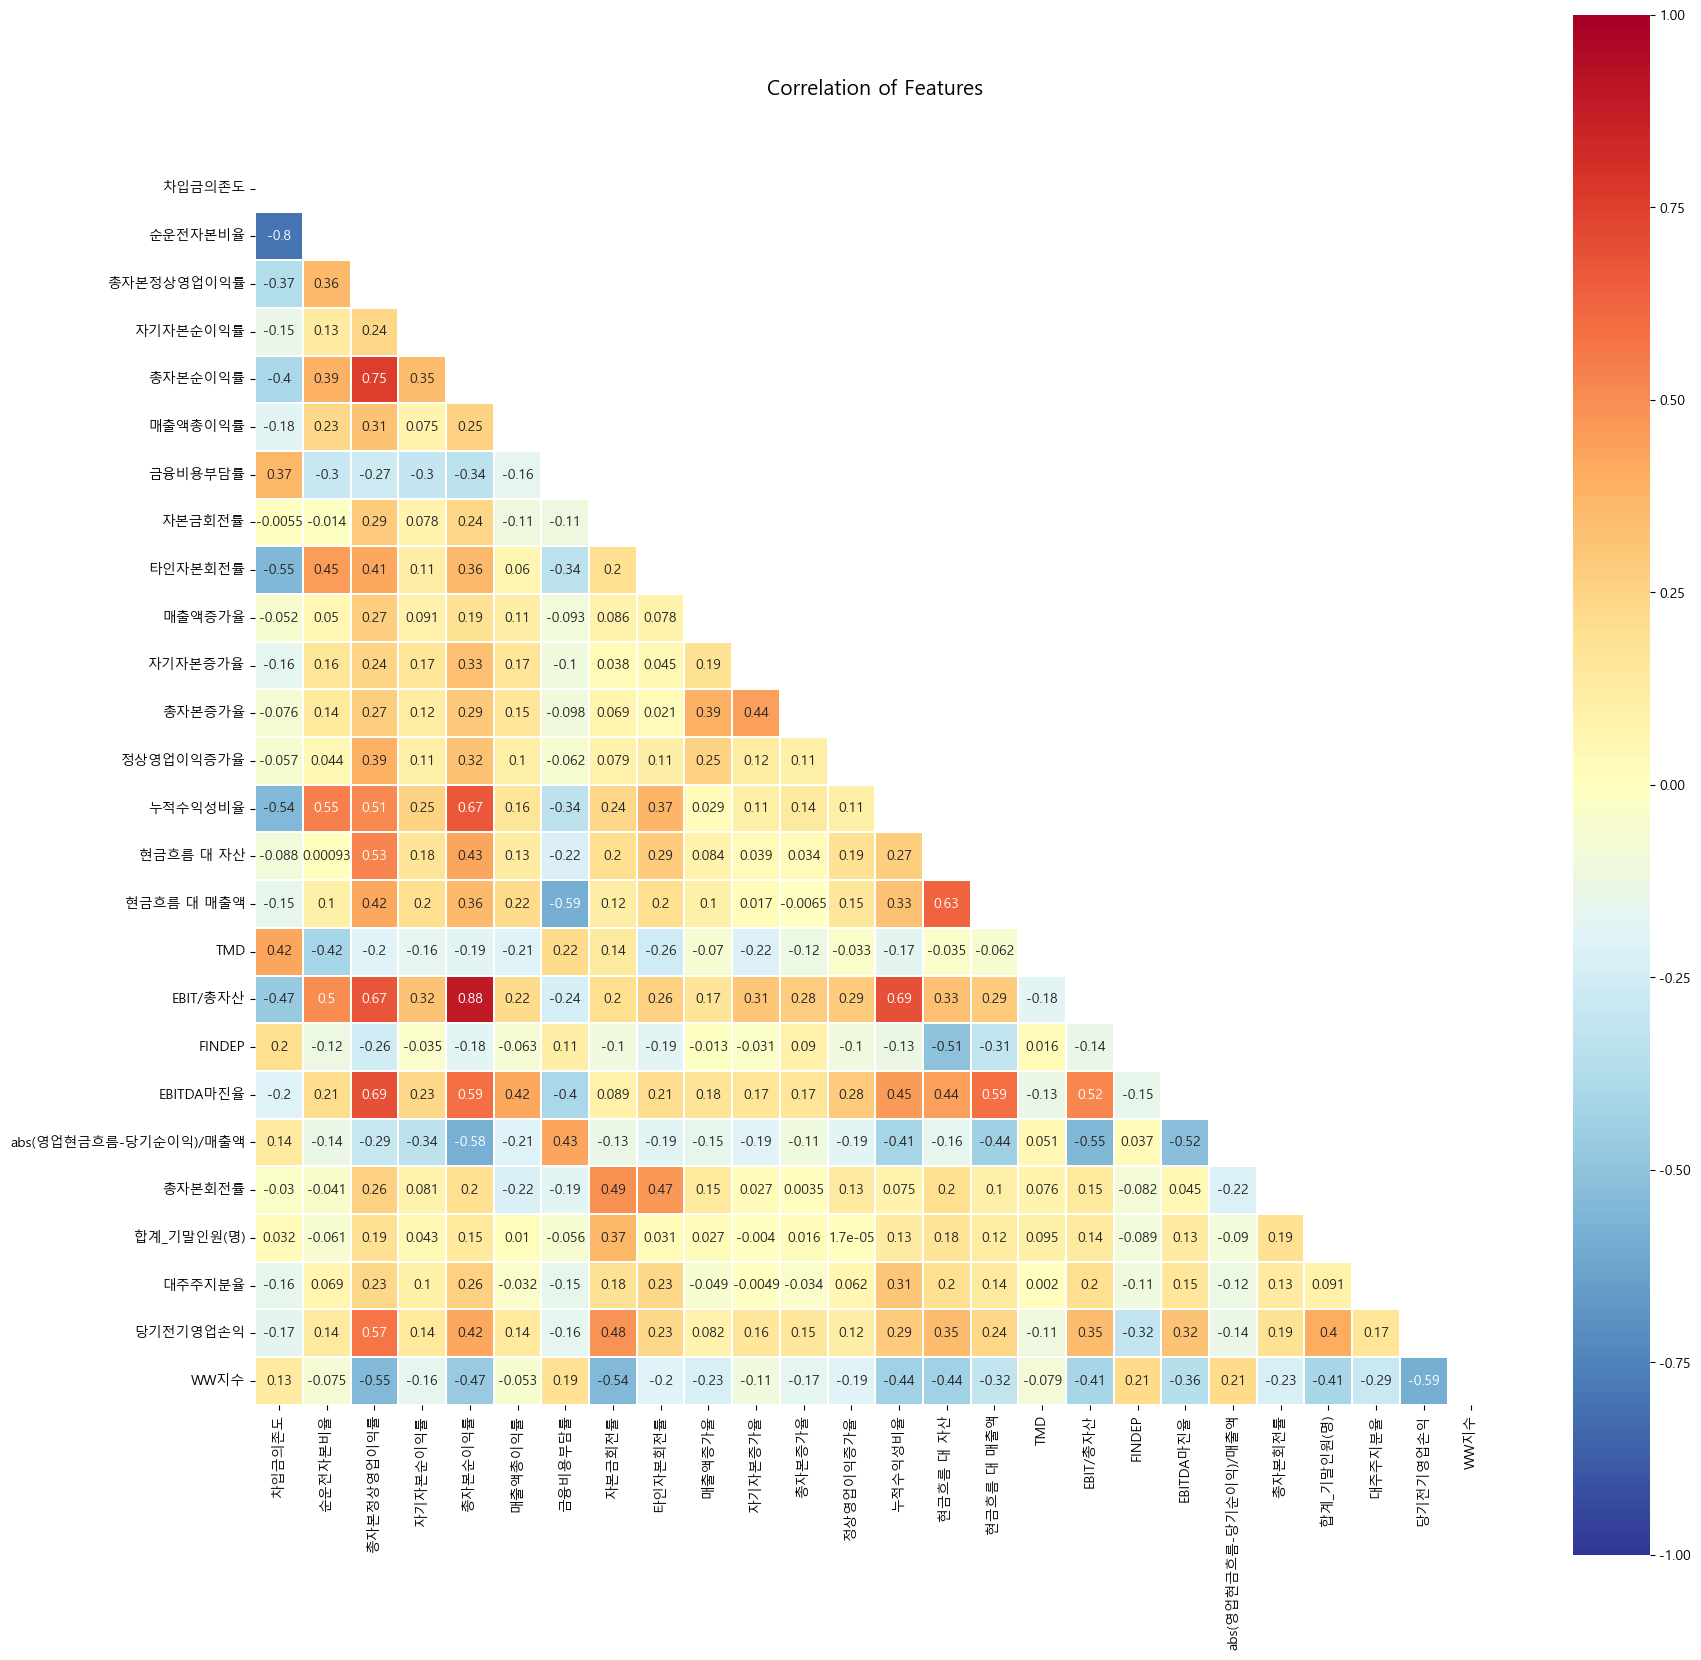

In [66]:
colormap = plt.cm.hot

corr = df_1.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(20, 20))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family="Malgun Gothic")
plt.title("Correlation of Features", y=1.05, size=15)
sns.heatmap(corr,  linewidths=0.1, vmax=1.0, vmin=-1.0, square=True,mask=mask,
            cmap='RdYlBu_r', linecolor="white", annot=True, annot_kws={'size': 10})